In [1]:
from __future__ import absolute_import
from __future__ import print_function
import os

#os.environ['KERAS_BACKEND'] = 'theano'
os.environ['KERAS_BACKEND'] = 'tensorflow'
#os.environ['THEANO_FLAGS']='mode=FAST_RUN,device=gpu0,floatX=float32,optimizer=None'


import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Merge, Permute
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint

from keras import backend as K
K.set_image_dim_ordering('th')

import cv2
import numpy as np
import json
np.random.seed(7) # 0bserver07 for reproducibility

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:


data_shape = 360*480

class_weighting= [0.2595, 0.1826, 4.5640, 0.1417, 0.5051, 0.3826, 9.6446, 1.8418, 6.6823, 6.2478, 3.0, 7.3614]


# load the model:
with open('segNet_basic_model.json') as model_file:
    segnet_basic = models.model_from_json(model_file.read())

# load weights
segnet_basic.load_weights("weights.best.hdf5")

# Compile model (required to make predictions)
segnet_basic.compile(loss="categorical_crossentropy", optimizer='adadelta', metrics=["accuracy"])

C:\Users\setty\Anaconda3\lib\site-packages\keras\engine\topology.py:1804: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "sequential_1_model" was not an Input tensor, it was generated by layer layer_1.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: layer_input_1:0
  str(x.name))


### Visualizing segnet basic model

http://www.codesofinterest.com/2017/02/visualizing-model-structures-in-keras.html

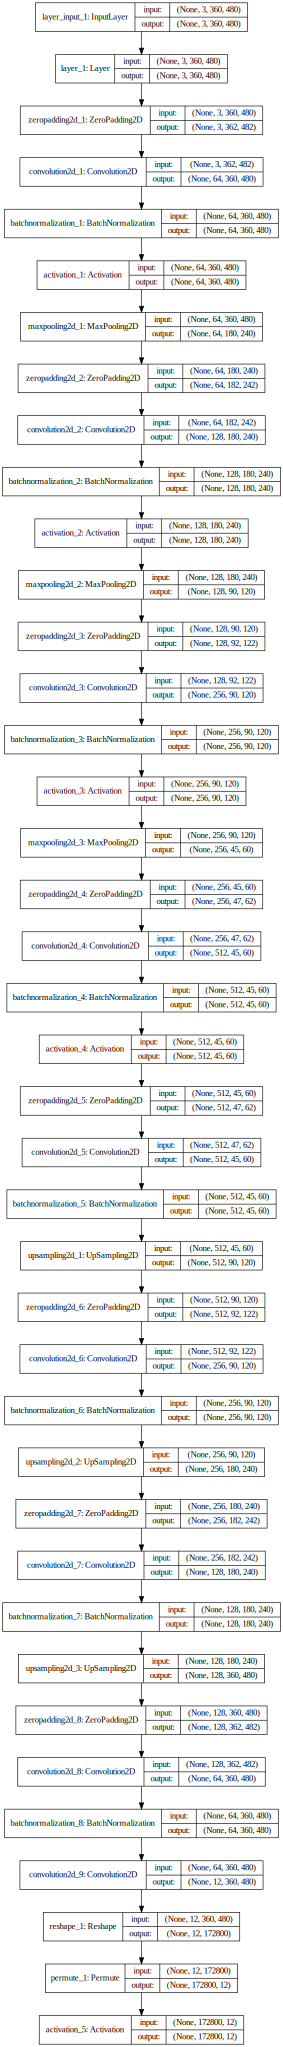

In [5]:
import keras.utils.visualize_util as vutil
from IPython.display import SVG

SVG(vutil.model_to_dot(segnet_basic,show_shapes=True).create(prog='dot', format="svg"))


In [ ]:
from IPython.display import SVG
from keras.utils.visualize_utils import model_to_dot

SVG(model_to_dot(segnet_basic).create(prog='dot', format='svg'))

In [ ]:
from keras.utils.visualize_util import plot  
plot(segnet_basic, to_file='segnet_basic.png')